<a href="https://colab.research.google.com/github/r-ap/TrainingMachineLearning/blob/main/BFI_PYIM_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistik Deskriptif

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/sales_data_sample.csv',encoding='latin-1')
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## Measurement of Central Tendency / Ukuran Pemusatan Data

### Rata-Rata

In [ ]:
data['QUANTITYORDERED'].mean()

35.09280906836698

Rata-rata penjualan 1 transaksi sebanyak 35 barang

### Nilai Tengah

In [ ]:
data['QUANTITYORDERED'].median()

35.0

Nilai tengah tiap transaksi adalah 35 barang

### Modus

In [ ]:
data['QUANTITYORDERED'].mode()

0    34
dtype: int64

Kebanyakan transaksi terdapat 34 barang

In [ ]:
data['STATUS'].mode()

0    Shipped
dtype: object

Kebanyakan status pengiriman barang "Shipped"

## Measurement of Variance / Ukuran Persebaran Data

### Standar Deviasi

In [ ]:
data['QUANTITYORDERED'].std()

9.741442737069592

Standar deviasi jumlah barang tiap transaksi = 9,74

### Variance

In [ ]:
data['QUANTITYORDERED'].var()

94.8957065996059

In [ ]:
data['QUANTITYORDERED'].unique()

array([30, 34, 41, 45, 49, 36, 29, 48, 22, 37, 23, 28, 46, 42, 20, 21, 24,
       66, 26, 38, 47, 35, 32, 40, 50, 39, 27, 44, 31, 33, 43, 56, 25, 64,
       19, 12, 55, 10, 54, 97, 61, 51, 59, 76,  6, 15, 60, 65, 58, 16, 70,
       13, 18, 52, 11, 62, 85, 77])

In [ ]:
data['YEAR_ID'].var()

0.4895383245804373

In [ ]:
data['YEAR_ID'].unique()

array([2003, 2004, 2005])

Variasi nilai quantityordered cukup bervariasi yaitu 94,9 dibandingkan year_ID

### Range

In [ ]:
qo_min = data['QUANTITYORDERED'].min()
qo_max = data['QUANTITYORDERED'].max()
print(f'Nilai minimum quantity ordered: {qo_min}')
print(f'Nilai maksimum quantity ordered: {qo_max}')
range = qo_max - qo_min
print(f'Rentang nilai quantity ordered: {range}')

Nilai minimum quantity ordered: 6
Nilai maksimum quantity ordered: 97
Rentang nilai quantity ordered: 91


### Persentil

In [ ]:
data['QUANTITYORDERED'].quantile(0.1)

22.0

### Kuartil

In [ ]:
q1 = data['QUANTITYORDERED'].quantile(0.25)
q2 = data['QUANTITYORDERED'].quantile(0.5)
q3 = data['QUANTITYORDERED'].quantile(0.75)

print(f"Kuartil 1 = {q1}")
print(f"Kuartil 2 = {q2}")
print(f"Kuartil 3 = {q3}")

Kuartil 1 = 27.0
Kuartil 2 = 35.0
Kuartil 3 = 43.0


**Box Plot**

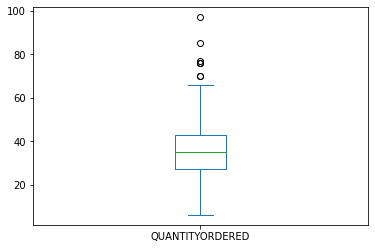

In [ ]:
data['QUANTITYORDERED'].plot(kind='box')

## Distribusi Data

### Histogram - Densitas

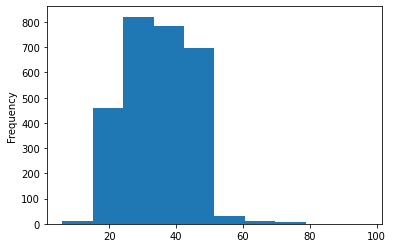

In [ ]:
data['QUANTITYORDERED'].plot(kind='hist',bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


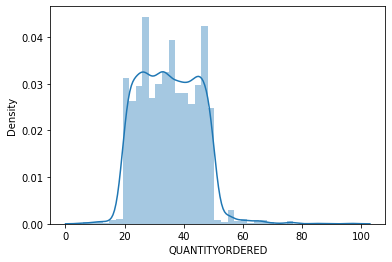

In [ ]:
sns.distplot(data['QUANTITYORDERED'])

### Skewness

In [ ]:
data['QUANTITYORDERED'].skew()

0.36258532878096345

### Kurtosis

In [ ]:
data['QUANTITYORDERED'].kurtosis()

0.4157437897745657

## Detecting Outlier / Extreme Value Analysis

### Z-Score

In [ ]:
lower_limit = data['QUANTITYORDERED'].mean() - 3 * data['QUANTITYORDERED'].std()
upper_limit = data['QUANTITYORDERED'].mean() + 3 * data['QUANTITYORDERED'].std()

print(f'Lower limit: {lower_limit}')
print(f'Upper limit: {upper_limit}')

Lower limit: 5.868480857158204
Upper limit: 64.31713727957576


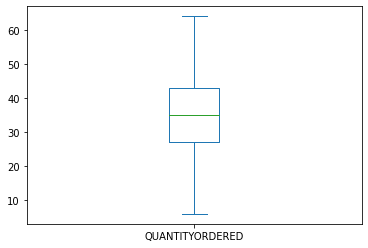

In [ ]:
qo_no_outlier = data['QUANTITYORDERED'][(data['QUANTITYORDERED'] >= lower_limit) & (data['QUANTITYORDERED'] <= upper_limit)]
qo_no_outlier.plot(kind='box')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


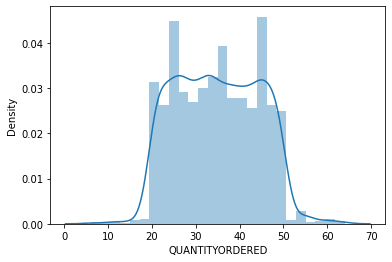

In [ ]:
sns.distplot(qo_no_outlier)

### Tukey's Rule

In [ ]:
IQR = q3-q1

lower_limit = q1 - IQR * 1.5
upper_limit = q3 + IQR * 1.5

print(f'Lower limit: {lower_limit}')
print(f'Upper limit: {upper_limit}')

Lower limit: 3.0
Upper limit: 67.0


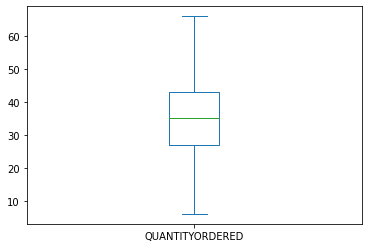

In [ ]:
qo_no_outlier = data['QUANTITYORDERED'][(data['QUANTITYORDERED'] >= lower_limit) & (data['QUANTITYORDERED'] <= upper_limit)]
qo_no_outlier.plot(kind='box')

## Korelasi

In [ ]:
data[['QUANTITYORDERED','SALES']].corr()

,QUANTITYORDERED,SALES
QUANTITYORDERED,1.000000,0.551426
SALES,0.551426,1.000000


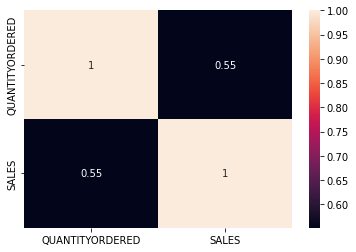

In [ ]:
sns.heatmap(data[['QUANTITYORDERED','SALES']].corr(),annot=True)

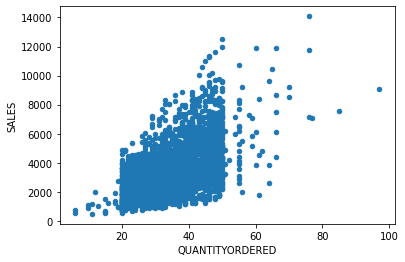

In [ ]:
data[['QUANTITYORDERED','SALES']].plot(kind='scatter',x='QUANTITYORDERED',y='SALES')